# Project Visualizations

In [1]:
import numpy as np
import csv
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
import pandas as pd

%matplotlib inline

## Helper Functions

In [2]:
def load_samples(csv_path):
    """Load samples from csv."""
    samples = []
    with open(csv_path) as f:
        reader = csv.reader(f)
        #next(reader)
        for row in reader:
            samples.append(row)
    
    return np.array(samples)

def plot_hist(Y, bins, xlabel=None, ylabel=None, title=None):
    hist, bin_edges = np.histogram(Y, bins=bins)
    plt.bar(bin_edges[:-1], hist, width=np.diff(bin_edges))
    plt.show()
    plt.close()

## Dataset Visualization

In [3]:
# get datasets
dataset_5_loops_joystick = load_samples(
    './data-joystick-5-loops/driving_log.csv')
dataset_5_loops_joystick_reversed = load_samples(
    './data-joystick-5-loops-reversed/driving_log.csv')
dataset_1_loop_keyboard = load_samples(
    './data-keyboard-1-loop/driving_log.csv')

In [4]:
print(dataset_5_loops_joystick.shape)
print(dataset_5_loops_joystick_reversed.shape)
print(dataset_1_loop_keyboard.shape)

(7606, 7)
(13614, 7)
(1311, 7)


In [5]:
dataset_1_loop_joystick = dataset_5_loops_joystick[:1311,:]
dataset_1_loop_joystick_reversed = dataset_5_loops_joystick_reversed[-1311:,:]
dataset_1_loop_joystick_both = np.vstack((dataset_1_loop_joystick, dataset_1_loop_joystick_reversed))
print(dataset_1_loop_joystick.shape)
print(dataset_1_loop_joystick_reversed.shape)
print(dataset_1_loop_joystick_both.shape)

(1311, 7)
(1311, 7)
(2622, 7)


Plot number of negative, zero and positive values for steering angles

In [6]:
n_joystick_neg = np.count_nonzero(dataset_1_loop_joystick[:,3].astype(np.float32) < 0)
n_joystick_zero = np.count_nonzero(dataset_1_loop_joystick[:,3].astype(np.float32) == 0)
n_joystick_pos = np.count_nonzero(dataset_1_loop_joystick[:,3].astype(np.float32) > 0)

n_joystick_both_neg = np.count_nonzero(
    dataset_1_loop_joystick_both[:,3].astype(np.float32) < 0)
n_joystick_both_zero = np.count_nonzero(
    dataset_1_loop_joystick_both[:,3].astype(np.float32) == 0)
n_joystick_both_pos = np.count_nonzero(
    dataset_1_loop_joystick_both[:,3].astype(np.float32) > 0)

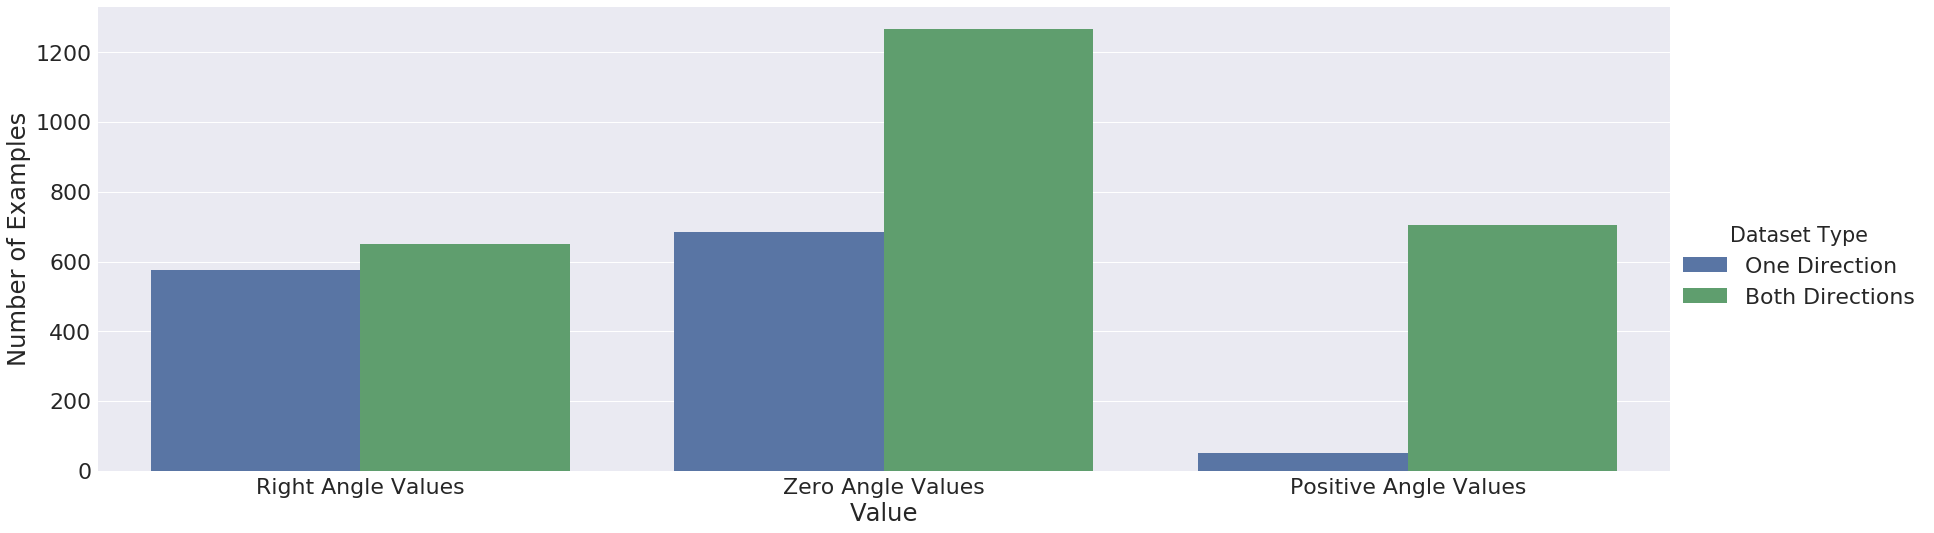

In [7]:
dfs = [
    pd.DataFrame({
        'Number of Examples': [
            n_joystick_neg,
            n_joystick_zero,
            n_joystick_pos
        ],
        'Value': [
            'Right Angle Values',
            'Zero Angle Values',
            'Positive Angle Values'
        ],
        'Dataset Type': 'One Direction'
    }),
    pd.DataFrame({
        'Number of Examples': [
            n_joystick_both_neg,
            n_joystick_both_zero,
            n_joystick_both_pos
        ],
        'Value': [
            'Right Angle Values',
            'Zero Angle Values',
            'Positive Angle Values'
        ],
        'Dataset Type': 'Both Directions'   
    }),
]
df = pd.concat(dfs)

sns.set(font_scale=2.2)
sns.factorplot(x='Value', y='Number of Examples',
    hue='Dataset Type', data=df,
    kind='bar', size=8,
    aspect=3)
plt.show()
plt.close()

Plot the difference between joystick and keyboard in steering values

In [8]:
n_keyboard_neg = np.count_nonzero(dataset_1_loop_keyboard[:,3].astype(np.float32) < 0)
n_keyboard_zero = np.count_nonzero(dataset_1_loop_keyboard[:,3].astype(np.float32) == 0)
n_keyboard_pos = np.count_nonzero(dataset_1_loop_keyboard[:,3].astype(np.float32) > 0)

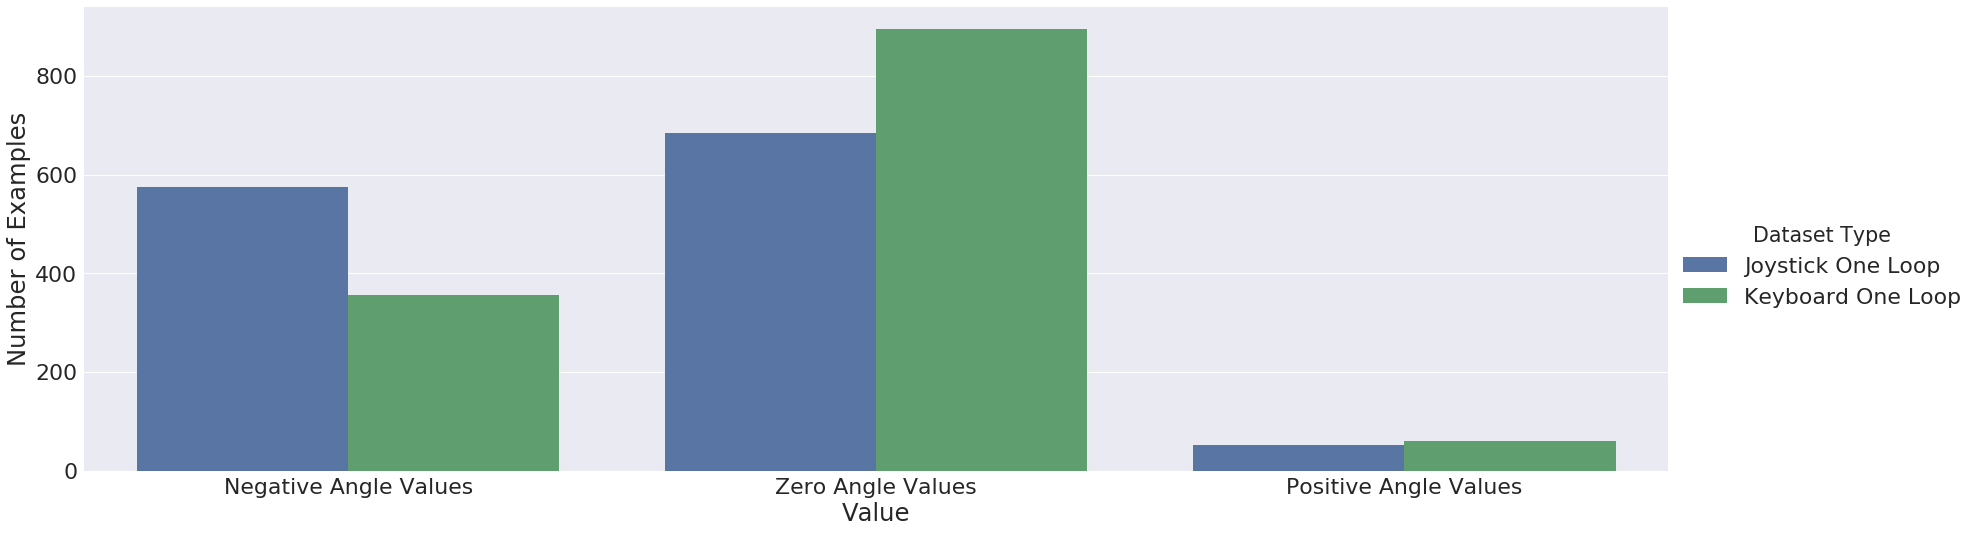

In [9]:
dfs = [
    pd.DataFrame({
        'Number of Examples': [
            n_joystick_neg,
            n_joystick_zero,
            n_joystick_pos
        ],
        'Value': [
            'Negative Angle Values',
            'Zero Angle Values',
            'Positive Angle Values'
        ],
        'Dataset Type': 'Joystick One Loop'
    }),
    pd.DataFrame({
        'Number of Examples': [
            n_keyboard_neg,
            n_keyboard_zero,
            n_keyboard_pos
        ],
        'Value': [
            'Negative Angle Values',
            'Zero Angle Values',
            'Positive Angle Values'
        ],
        'Dataset Type': 'Keyboard One Loop'   
    }),
]
df = pd.concat(dfs)

sns.set(font_scale=2.2)
sns.factorplot(x='Value', y='Number of Examples',
    hue='Dataset Type', data=df,
    kind='bar', size=8,
    aspect=3)
plt.show()
plt.close()

## Camera Images Examples

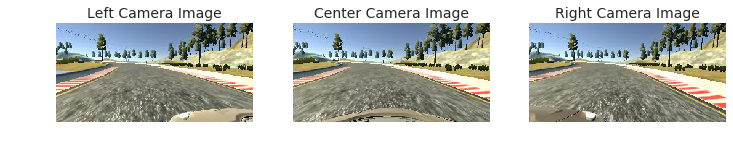

(160, 320, 3)


In [10]:
csv_path = 'data-joystick-5-loops/'

left_path = './' + csv_path + 'IMG/' + dataset_5_loops_joystick[400, 1].split('/')[-1]
center_path = './' + csv_path + 'IMG/' + dataset_5_loops_joystick[400, 0].split('/')[-1]
right_path = './' + csv_path + 'IMG/' + dataset_5_loops_joystick[400, 2].split('/')[-1]

imgs = [mpimg.imread(left_path), mpimg.imread(center_path), mpimg.imread(right_path)]

plt.figure(figsize=(12, 4))
plt.subplot(1,3,1)
plt.imshow(imgs[0])
plt.axis('off')
plt.title('Left Camera Image', fontsize=14)
plt.subplot(1,3,2)
plt.imshow(imgs[1])
plt.axis('off')
plt.title('Center Camera Image', fontsize=14)
plt.subplot(1,3,3)
plt.imshow(imgs[2])
plt.axis('off')
plt.title('Right Camera Image', fontsize=14)
plt.show()
plt.close()
print(imgs[1].shape)

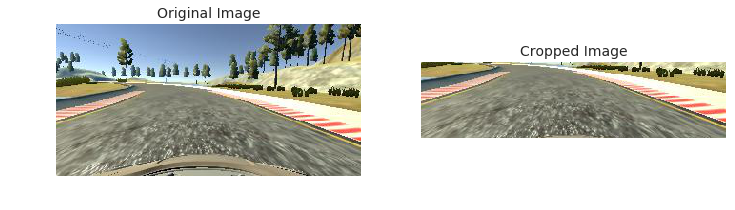

In [11]:
# cropped image
plt.figure(figsize=(12, 4))
plt.subplot(1,2,1)
plt.imshow(imgs[1])
plt.axis('off')
plt.title('Original Image', fontsize=14)
plt.subplot(1,2,2)
plt.imshow(imgs[1][60:140])
plt.axis('off')
plt.title('Cropped Image', fontsize=14)
plt.show()
plt.close()

## Plot Train and Validation Losses

In [12]:
# https://github.com/wphw/CarND-Behavioral-Cloning-P3/blob/master/saved-models/log
train_loss = [
    0.0161,
    0.0108,
    0.0081,
    0.0062,
    0.0052,
    0.0045,
    0.0040,
    0.0035,
    0.0032,
    0.0029
]
valid_loss = [
    0.0112,
    0.0097,
    0.0067,
    0.0063,
    0.0063,
    0.0060,
    0.0058,
    0.0054,
    0.0054,
    0.0055
]

print(len(train_loss))
print(len(valid_loss))

10
10


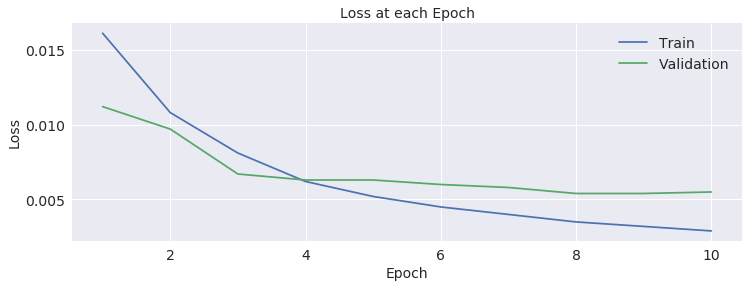

In [13]:
x = np.arange(1,11)

plt.figure(figsize=(12,4))
plt.plot(x, train_loss, label='Train')
plt.plot(x, valid_loss, label='Validation')
plt.title('Loss at each Epoch', fontsize=14)
plt.xlabel('Epoch', fontsize=14)
plt.ylabel('Loss', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=14)
plt.show()
plt.close()